In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns  # For enhanced visualization.

In [4]:
# Step 1: Load the dataset.
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)


In [6]:
# Step 2: Prepare the data. Separate features and target.
X = iris_df.iloc[:, :-1]  # All rows and, all column except the last column.
y = iris_df.iloc[:, -1]   # All rows and last column.

In [8]:
# Step 3: Split the data into training and validation sets.
# We will split 80% as training data and 20 % as validation data, so test_size = 0.2
# We want it to generate split with same random-ness on every run, hence set base random_state=42.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 4: Train the model.
# We try to achieve minimum loss function hence increases the max iteration count to 200.
# Default is 100.
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [12]:
# Step 5: Make prediction.
predictions = model.predict(X_val)

In [14]:
# Step 6: Evaluate the model.
accuracy = accuracy_score(y_val, predictions) # The proportion of correctly predicted observations to the total observations
conf_mat = confusion_matrix(y_val, predictions) # Let's understand this more.
class_report = classification_report(y_val, predictions) # Let's understand this more.

print("\nAccuracy is:\n", accuracy)
print("\nConfusion Matrix is:\n", conf_mat)
print("\nClassification report is:\n", class_report)


Accuracy is:
 1.0

Confusion Matrix is:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification report is:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



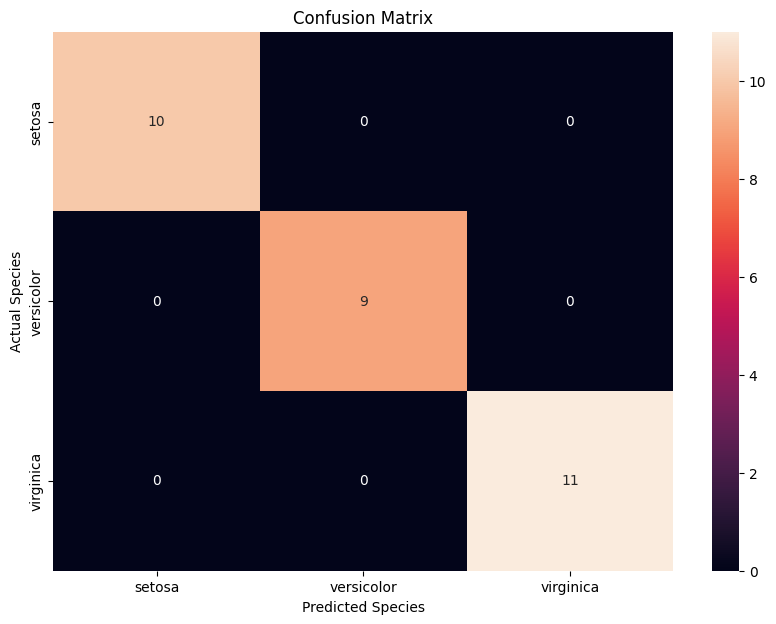

In [15]:
# Step 7: Visualization.
plt.figure(figsize=(10, 7))  # Window size.
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()